##Implementação de uma Rede Neural Convolucional (CNN) para classificação de imagens usando o TensorFlow e o Keras.

Usaremos o conjunto de dados MNIST, que contém imagens de dígitos escritos à mão, e treinaremos uma CNN para classificar cada imagem em um dos 10 dígitos (0 a 9).

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 58s 33ms/step - accuracy: 0.8860 - loss: 0.3629 - val_accuracy: 0.9823 - val_loss: 0.0612
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 32ms/step - accuracy: 0.9841 - loss: 0.0496 - val_accuracy: 0.9828 - val_loss: 0.0607
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 53s 32ms/step - accuracy: 0.9890 - loss: 0.0326 - val_accuracy: 0.9883 - val_loss: 0.0391
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9921 - loss: 0.0254 - val_accuracy: 0.9897 - val_loss: 0.0356
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.9939 - loss: 0.0183 - val_accuracy: 0.9890 - val_loss: 0.0438
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9850 - loss: 0.0455
Acurácia no conjunto de teste: 0.9891999959945679


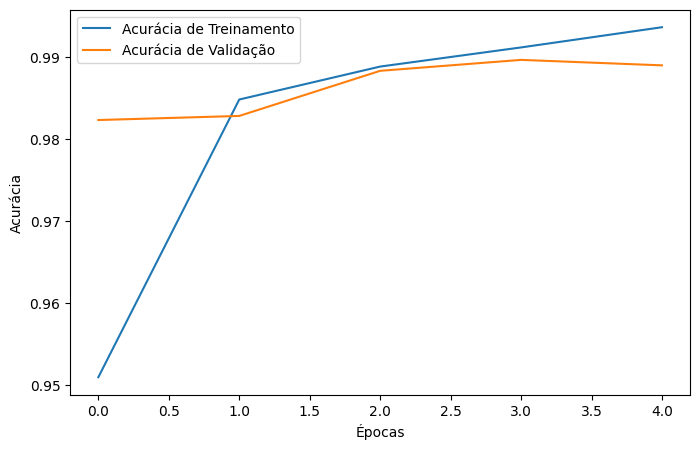

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

#Carregar o conjunto de dados MNIST
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

#Normalizar os valores dos pixels para o intervalo [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0
#Adcionar uma dimensão para os canais de cor (imagens em escala de cinza)
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]
#Converter os rótulos em vetores one-hot
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation= 'relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)
test_lost, test_accuracy = model.evaluate(x_test, y_test)
print("Acurácia no conjunto de teste:", test_accuracy)
#plotar a curva de aprendizado
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()